# Assignment 2 - Diversity in Tech Dataset
Candidate Number: AB09137

I am aiming to analyse this dataset to find out whether there is a gender disparity in tech (this includes social media companies) companies by breaking down the datset and plotting various graphs to visualise the information. 


I hope to do this by plotting bar and line graphs using Seaborn in conjunction with Pandas, which is a powerful Python library that can manipulate the dataset. 


Before the dataset was imported, it was edited and cleaned up in Excel to make it easier to process the data in Python, since Excel is a more powerful tool to rearrange columns or change incorrectly formatted data, whereas Pandas is a much better tool for other uses, such as in my case, excluding or including certain columns or rows and filtering out data that I did not need to support my argument.  

In [31]:
## Imports for the varius libaraies
import pandas as pd
import numpy as np
import seaborn as sns

# Use seaborn's default graphing theme
sns.set_theme()

In [32]:
## Import the excel spreadsheet
data=pd.read_excel("data/final2.xlsx")

## Get the head of data to check its all in order
data.head()

,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Year Code,Type
0,Facebook,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
1,Instagram,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
2,Google+,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
3,YouTube,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
4,LinkedIn,42.0,58.0,52.0,39.0,4.0,4.0,2.0,0.01,NaN,5,Social Media


In [27]:
# Create an overview of the dataset
data.describe()

,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Year Code
count,164.000000,164.000000,164.000000,161.000000,159.000000,159.000000,116.000000,139.000000,14.000000,164.000000
mean,35.364552,64.533971,59.719813,24.599783,6.687682,5.063310,3.138879,1.343632,4.577143,3.036585
std,12.248283,12.273343,11.030223,12.938665,4.244932,4.211453,2.859016,1.415435,5.966748,1.418070
min,4.800000,24.000000,37.000000,1.800000,2.000000,1.000000,0.010000,0.000000,1.000000,1.000000
25%,30.000000,57.000000,50.000000,12.000000,4.000000,2.000000,2.000000,0.010000,1.000000,2.000000
50%,36.100000,63.450000,59.000000,25.000000,5.000000,3.000000,2.260000,1.000000,2.000000,3.000000
75%,42.250000,70.111863,67.000000,37.000000,8.316830,8.000000,4.000000,2.500000,5.000000,4.000000
max,76.000000,95.000000,87.000000,45.000000,19.000000,21.000000,14.000000,5.000000,21.100000,5.000000


```.describe()``` was used as a general overview to describe the maximum and minimum female and male percentage, as well as the mean and std. This information was used as preliminary research to gather a general understanding of the dataset and decide further lines of investigation. 

For example, I can clearly see that the mean female percentage (35.36%) is much lower than the male percentage (64.53%). 






Now, I would like to find out which companies in a given year had more female employees than average.

### Which companies are above average in their percentage of women employees?

Firstly, I am going to calculate the mean of year 1. 

In [37]:
# This line omits the 'Typical Population' and 'Comparison' types and also filters for just Year Code = 1 
data2 = data[(data['Type'] != 'Typical Population') & (data['Type'] != 'Comparison') & (data['Year Code'] == 1)]

# Get only the female percentage and company columns
data2 = data2[['Female %', 'Company']]

# Work out the mean of the year
mean = data2['Female %'].mean()

mean

33.962143505903725

This code works out the mean percentage of female employees in year 1, this is 33.96%. 
Now I am going to compare each company against that average to see which ones are above and below. 

In [46]:
# Get all of the names of the comapnies by filtering data2 for just the company column 
# And then outputting it to a variable as an array
companies = data2['Company'].array

# Get all of the percentage of all the companies by filtering data2 for just the female % and output as array
percentages = data2['Female %'].array

# Create two blank arrays to store the result
aboveaverage = []
belowaverage = []

# I can now iterate through every company name and there percentages using the zip() function
for company, percent in zip(companies, percentages): 
    print(company, percent)
    # Append it to the above average if the percentage is greater than the mean percentage 
    if percent > mean:
        aboveaverage.append(company)
    # Else add it to the below average aray, you could print it out to see which companies are below average 
    else:
        belowaverage.append(company)
        
# Create a string that joins all the elements in the above average array with ', ' so that they look better when printed
string_list_of_companies = ', '.join(aboveaverage)     

# print out these companies
print('\nThese are the tech and social media companies that are in forfront trying to ensure diversity: ',string_list_of_companies)
    
    


Facebook 31.0
Instagram 31.0
Google+ 30.0
YouTube 30.0
LinkedIn 39.0
Pinterest 40.0
Tumblr 37.0
Flickr 37.0
Twitter 30.0
Yahoo! 37.0
Google 30.0
Apple 30.0
Cisco 23.0
eBay 42.0
HP 33.0
Indiegogo 45.0
Nvidia 16.053587647593098
Dell 30.0
Ingram Micro 42.0
Intel 25.0
Groupon 47.0
Amazon 37.0
Salesforce 29.0
Pandora 49.0
Microsoft 29.0

These are the tech and social media companies that are in forfront trying to ensure diversity:  LinkedIn, Pinterest, Tumblr, Flickr, Yahoo!, eBay, Indiegogo, Ingram Micro, Groupon, Amazon, Pandora


The program compares each company one by one using a forloop, and than appends an array if the companies precentage of female employees is greater than the mean of year 1. 

In [9]:
## Since I reordered the dataset in excel, I can just ask pandas to give my any type of data that I need:
types = ', '.join(set(data["Type"].tolist()))
types = input("Chose to filter from "+ types + ": ")

data[data["Type"] == types]

Chose to filter from Social Media, Typical Population, Comparison, Tech Companies: Social Media


,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Year Code,Type
0,Facebook,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
1,Instagram,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,5,Social Media
2,Google+,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
3,YouTube,31.0,69.0,56.0,35.0,4.0,2.0,4.0,1.00,NaN,5,Social Media
4,LinkedIn,42.0,58.0,52.0,39.0,4.0,4.0,2.0,0.01,NaN,5,Social Media
5,Pinterest,45.0,55.0,48.0,41.0,6.0,3.0,2.0,1.00,NaN,5,Social Media
6,Tumblr,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.00,NaN,5,Social Media
7,Flickr,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.00,NaN,5,Social Media
8,Twitter,38.4,61.6,43.5,25.8,3.4,3.4,2.7,NaN,21.1,5,Social Media
9,Facebook,35.0,65.0,49.0,40.0,5.0,3.0,3.0,1.00,NaN,4,Social Media


The cell above takes a raw list of all the rows of data in the ```Type``` column, filters out the repeats using ```set()``` then compiles them into a comma seperated using ```", ".join(array)``` and then asks the user which of those values they would like to filter for, then indexes the ```data``` DataFrame to filter out those values

Next, I am going to work out the mean percentage of men and women in the tech work place. 

In [10]:
# Exclude Types that are Typical Population and Comparison because these aren't actually companies
mean = data[(data['Type'] != 'Typical Population') & (data['Type'] != 'Comparison')]

# Isolate the female and male percentage only
mean = mean[['Female %', 'Male %']]

# Find the mean of all the female and male columns 
mean = mean.mean()

# Make mean a Dataframe
mean = pd.DataFrame(mean)

# Reset the index
mean.reset_index(inplace=True)

# Rename the column names 
mean.columns = ['Gender', 'Percentage']

# Print mean
mean

# Select only the type 'Typical Population'
typ = data[(data['Type'] == 'Typical Population')] 
            
# Isolate the female and male percentage only
typ = typ[['Female %', 'Male %']]

# Find the mean of all the female and male columns 
typ = typ.mean()

# Make typ a Dataframe
typ = pd.DataFrame(typ)

# Reset the index
typ.reset_index(inplace=True)

# Rename the column names 
typ.columns = ['Gender', 'Percentage']

# Print typ
print(typ)
print(mean)



     Gender  Percentage
0  Female %   50.875143
1    Male %   49.124857
     Gender  Percentage
0  Female %   35.587035
1    Male %   64.296717


I am going to create two bar graphs with seaborn to answer the question: 'How does the percentage of females compared to males in tech companies compared to the percentage of women to men in the general US population?'

### Figure 1:  What is the female % vs. male % in the companies in the dataset? 



<AxesSubplot:xlabel='Gender', ylabel='Percentage'>

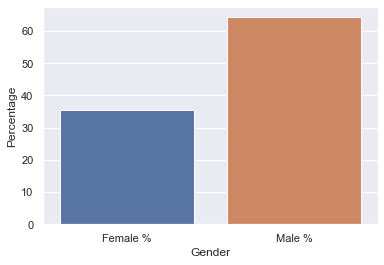

In [18]:
# Create bar graph with the mean dataframe 
sns.barplot(x='Gender', y="Percentage", data=mean)

### Figure 2: What is the female % vs. male % in the average US population?

<AxesSubplot:xlabel='Gender', ylabel='Percentage'>

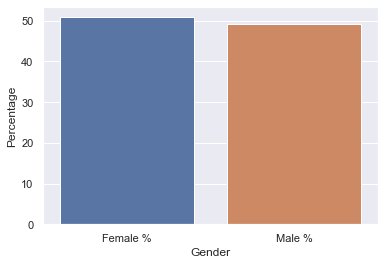

In [19]:
# Create bar graph from typ datframe
sns.barplot(x='Gender', y="Percentage", data=typ)

This graph clearly shows that there are slightly more women in the general US population in comaprison to men, however the graph above this the proportion is evidently not shared in tech companies. Next I will make some code that will display how the female percentage in the data set has changed year on year. 


### Figure 3: How has the female % changed year on year?

<AxesSubplot:xlabel='Year Code', ylabel='Female %'>

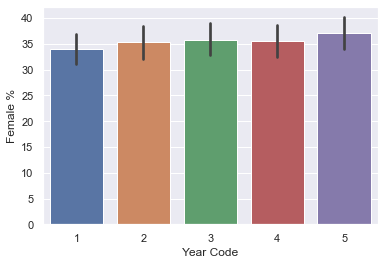

In [20]:
# Filter out the typical population and 'comparison'from the Type coloumns 
# Since they dont actually give company data
filtered = data[(data['Type'] != 'Typical Population') & (data['Type'] != 'Comparison')]

# Filter out just for year and female percentage 
filtered = filtered[['Female %', 'Year Code']]

# Plot that on a bar graph 
sns.barplot(x='Year Code', y="Female %", data=filtered)

This graph shows the miniscule chnage of female population each year. This is quite small, so I decided to look at the graph that displays the **change of percentage** year on year. 

### Figure 4: Has the change in female % increased or decreased each year? 

<AxesSubplot:xlabel='Year Code', ylabel='Female %'>

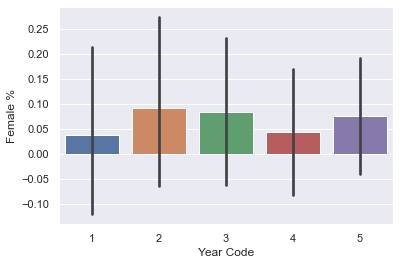

In [22]:
# Save the year codes as a varaible so we can redefine them later 
# (Since the .pct_change function applies to them too) 
year_code = filtered['Year Code']

# Get the change of female % each year as a dataframe
change = filtered.pct_change()

# Redfine the year code to change it back to the original 
change['Year Code'] = year_code

sns.barplot(x='Year Code', y="Female %", data=change)


Evidently, there has been no decreases in the changes, this shows that year on year, the percentage is increasing.


I will now look at which companies have increased or decreased their female percentage of employees over time using a line graph. 

### Figure 5: What companies have changed their percentage in female employees? 

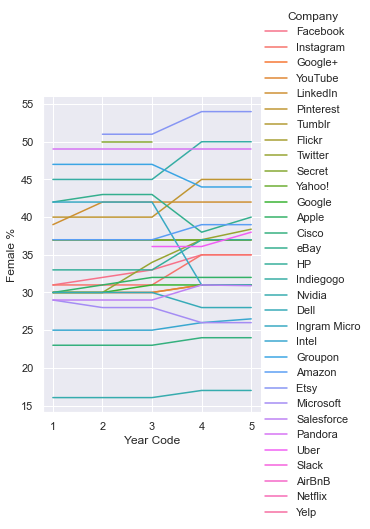

In [23]:
# Filter out the typical population and 'comparison'from the Type coloumns 
# Since they dont actually give company data
all_companies = data[(data['Type'] != 'Typical Population') & (data['Type'] != 'Comparison')]

# Plot that as a line graph 
sns.relplot(
    data=all_companies, 
    x='Year Code',
    y='Female %',
    hue='Company',
    kind='line',
    height=5,
    aspect=.75
)







On an overiew we can clearly see which companies have increased or decreased their percentage of female employees. 

Now I now which companies in general have increased or decreased the percentage of female workers in their company, I will now isolate particular single companies that have increased or decreased their percentage each year. 

### Figure 6: Has instagram increased or decreased their percentage of female workers?

<AxesSubplot:xlabel='Year Code', ylabel='Female %'>

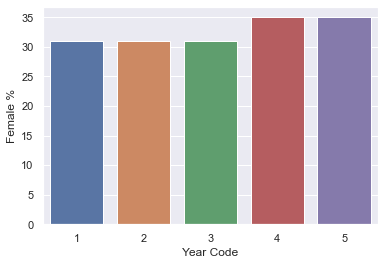

In [26]:
# Isolate some particular companies and their chnages in female employees
instagram = data[['Female %', 'Year Code']][data['Company'] == 'Instagram']

microsoft = data[['Female %', 'Year Code']][data['Company'] == 'Microsoft']

# Create graph for Instagram and Microsoft
sns.barplot(x='Year Code', y="Female %", data=instagram)


<AxesSubplot:xlabel='Year Code', ylabel='Female %'>

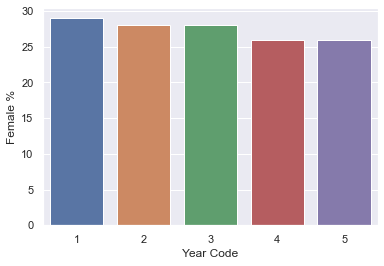

In [25]:
sns.barplot(x='Year Code', y="Female %", data=microsoft)

Clearly, Instagram have increased and Microsoft has decreased. This code can be chnaged for any other company for example Airbnb or Ebay. Microsoft and Instagram were both chosen because they are examples that have gone down or up respectively. 








After analysing the data set, I concluded that there is a persitent gender disparity in tech companies and that up to this day women are underrepresented in the field of work. In general, Pandas was a good tool for the job and it made it very easy to pull up the data I needed.